In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Loading the dataset

In [2]:
df = pd.read_csv("C:\\Users\\farhanfarooq\\Desktop\\work files\\ExcelR\\Assignments\\Assign.MLR\\50_Startups MLR.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# visualising the data

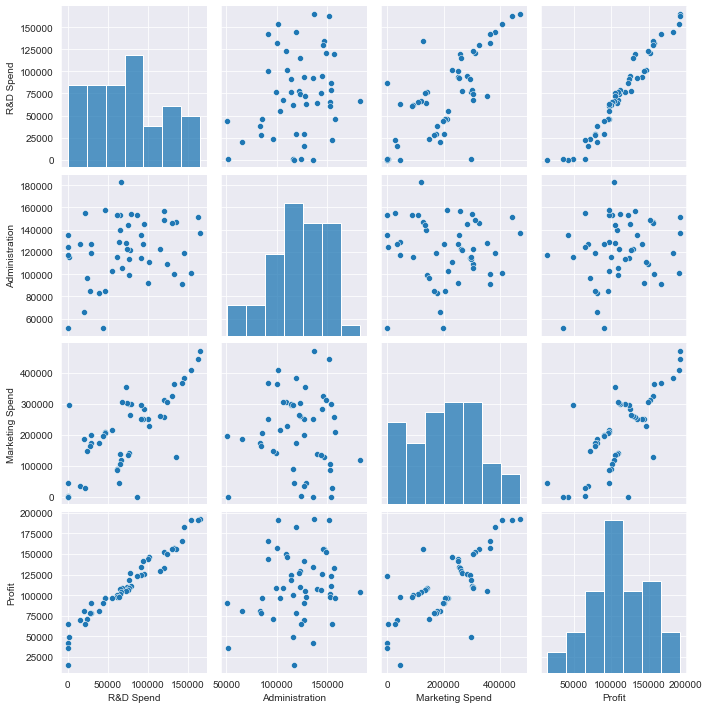

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

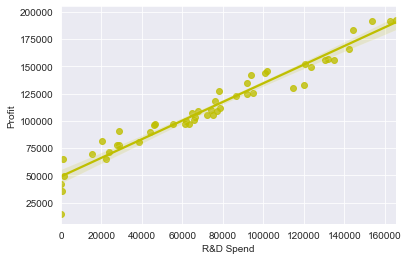

In [11]:
sns.regplot(x='R&D Spend',y='Profit',data=df,color='y')

<AxesSubplot:>

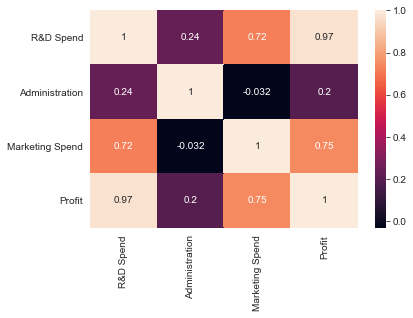

In [12]:
sns.heatmap(df.corr(),annot=True)

# Renaming the columns

In [17]:
df1=df.rename({'R&D Spend':'RDS','Administration':'ADS','Marketing Spend':'MS'},axis=1)
df1.head()

,RDS,ADS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Preparing Models

In [18]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RDS+ADS+MS',data=df1).fit()

In [19]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [20]:
#Beta Coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
MS               0.027228
dtype: float64

In [21]:
#finding t and p_values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RDS          17.846374
ADS          -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADS          6.017551e-01
MS           1.047168e-01
dtype: float64


In [26]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression

In [23]:
ml_R=smf.ols('Profit~RDS',data=df1).fit()
# t and p_values
print(ml_R.pvalues, '\n', ml_R.pvalues)

Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64 
 Intercept    2.782697e-24
RDS          3.500322e-32
dtype: float64


In [24]:
ml_A=smf.ols('Profit~ADS',data=df1).fit()
print(ml_A.pvalues, '\n', ml_A.tvalues)

Intercept    0.003824
ADS          0.162217
dtype: float64 
 Intercept    3.040044
ADS          1.419493
dtype: float64


In [25]:
ml_M=smf.ols('Profit~MS',data=df1).fit()
print(ml_M.pvalues, '\n', ml_M.tvalues)

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64 
 Intercept    7.808356
MS           7.802657
dtype: float64


# Calculating VIF (Variance Inflation Factor)

In [32]:
rsq_RD = smf.ols('RDS~ADS+MS',data=df1).fit().rsquared
vif_RD = 1/(1-rsq_RD)  # 2.4689030699947017

rsq_AD = smf.ols('ADS~RDS+MS',data=df1).fit().rsquared
vif_AD = 1/(1-rsq_AD) # 1.1750910070550453

rsq_M = smf.ols('MS~ADS+RDS',data=df1).fit().rsquared
vif_M = 1/(1-rsq_M) # 2.3267732905308773

#Storing vif in a dataframe
d1 = {'Variables':['RDS','ADS','MS'],'VIF':[vif_RD,vif_AD,vif_M]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADS,1.175091
2,MS,2.326773


In [39]:
df1['Predicted Profit'] = model.fittedvalues
df1['Errors'] = model.resid
df1.head(10)

,RDS,ADS,MS,State,Profit,Predicted Profit,Errors,Predicted
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890,192521.252890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768,189156.768232
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904,182147.279096
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974,173696.700026
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183,172139.514183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571,163580.780571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669,158114.096669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048,160021.363048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301,151741.699699
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110,154884.684110


In [41]:
df2=df1.drop(['Predicted'],axis=1)
df2.head(10)

,RDS,ADS,MS,State,Profit,Predicted Profit,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


# Residual Analysis

# Test for Normality of Residuals (Q-Q PLot)

In [43]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

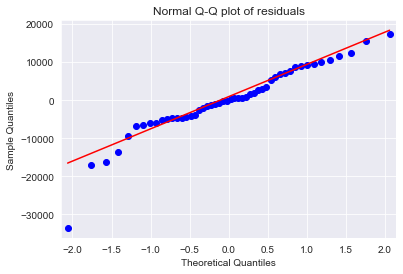

In [44]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [50]:
list(np.where(model.resid>15000))

[array([36, 45], dtype=int64)]

C:\Users\farhanfarooq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Errors'>

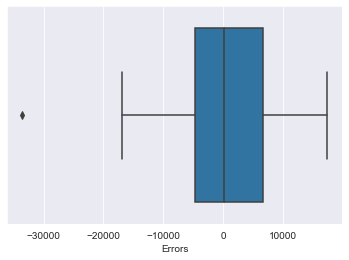

In [46]:
sns.boxplot(df2['Errors'])

<AxesSubplot:xlabel='Errors', ylabel='Count'>

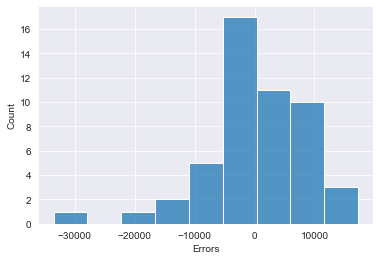

In [47]:
sns.histplot(df2['Errors'])

C:\Users\farhanfarooq\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Errors', ylabel='Density'>

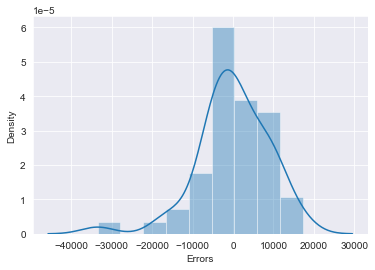

In [51]:
sns.distplot(df2['Errors'])

# Residual Plot for Homoscedasticity

In [52]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()

0     2.048512
1     1.962904
2     1.784550
3     1.569528
4     1.529906
5     1.312132
6     1.173034
7     1.221564
8     1.010891
9     1.090863
10    0.597857
11    0.599503
12    0.435750
13    0.393765
14    0.955090
15    0.870779
16    0.124749
17    0.462578
18    0.432599
19    0.092175
20    0.117733
21    0.135030
22    0.068557
23   -0.051297
24    0.034359
25   -0.248719
26   -0.035929
27    0.060951
28   -0.263418
29   -0.259984
30   -0.319591
31   -0.364489
32   -0.331068
33   -0.358709
34   -0.584549
35   -0.547086
36   -0.934491
37   -0.569784
38   -1.076695
39   -0.719666
40   -0.946456
41   -0.946797
42   -1.053210
43   -1.319192
44   -1.206108
45   -1.637667
46   -1.420992
47   -1.667184
48   -1.598972
49   -1.623304
dtype: float64
0    -0.029001
1     0.294602
2     0.995289
3     1.029070
4    -0.665334
5    -0.736666
6    -0.222642
7    -0.477210
8     0.052550
9    -0.572899
10    1.186432
11    0.970983
12    1.391517
13    0.762344
14   -1.894413
15   -1.82

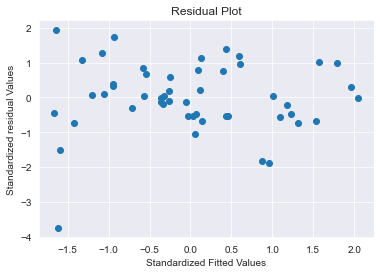

In [53]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))


plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual Values')
plt.show()

In [54]:
get_standardized_values(model.resid).mean()

0.0